<a href="https://colab.research.google.com/github/MuhammadUsmanAslam111/demo-repo/blob/main/EdaAndCleaning%2BmodelImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES AND LOADING CSV

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/WineQT.csv")


In [46]:
# Round all numeric columns to 4 decimal places
df= df.round(4)
print(df.head())
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  Id
0            7.4              0.70         0.00  ...      9.4        5   0
1            7.8              0.88         0.00  ...      9.8        5   1
2            7.8              0.76         0.04  ...      9.8        5   2
3           11.2              0.28         0.56  ...      9.8        6   3
4            7.4              0.70         0.00  ...      9.4        5   4

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total s

In [47]:
# Count missing values per column
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


NO MISSING VALUE IN THE GIVEN DATA SET


In [48]:
df.drop('Id', axis=1, inplace=True)


In [49]:
print(df.duplicated().sum())  # How many duplicate rows?
df.drop_duplicates(inplace=True)  # Remove them if any


125


In [50]:
print(df.describe())

       fixed acidity  volatile acidity  ...      alcohol      quality
count    1018.000000       1018.000000  ...  1018.000000  1018.000000
mean        8.288507          0.533541  ...    10.452456     5.641454
std         1.741324          0.183167  ...     1.095064     0.811744
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.100000          0.645000  ...    11.200000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]


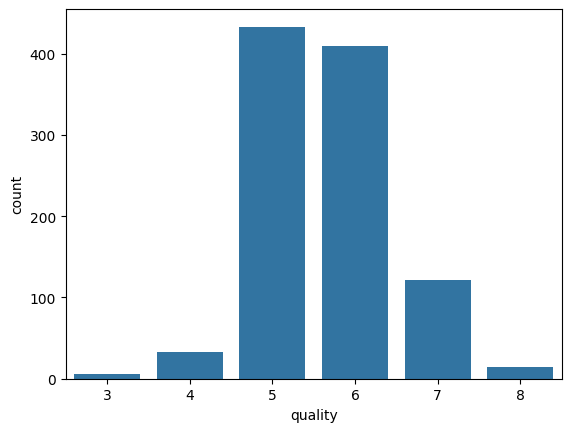

In [51]:
sns.countplot(x='quality', data=df)
plt.show()


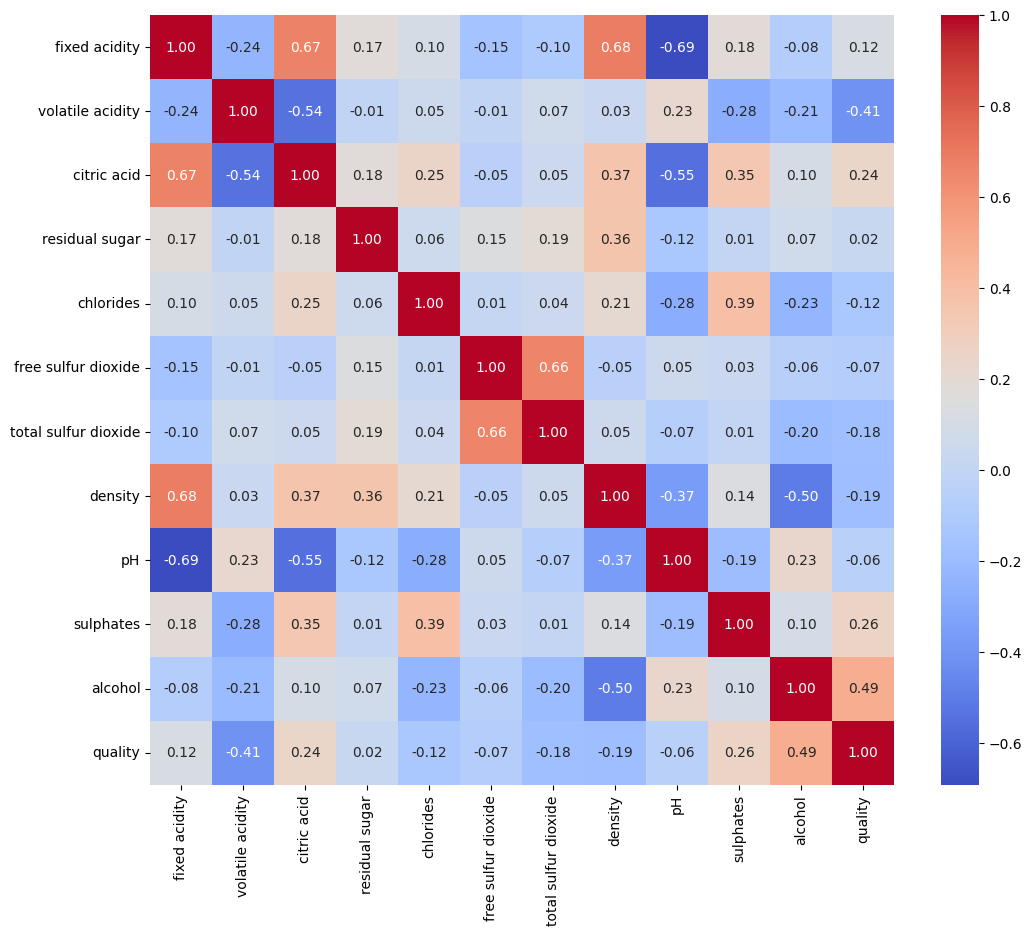

In [52]:
corr = df.corr()

# Set figure size (width, height)
plt.figure(figsize=(12,10))

# Plot heatmap
sns.heatmap(corr.round(4), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

outlier checking

In [53]:
df.shape

(1018, 12)

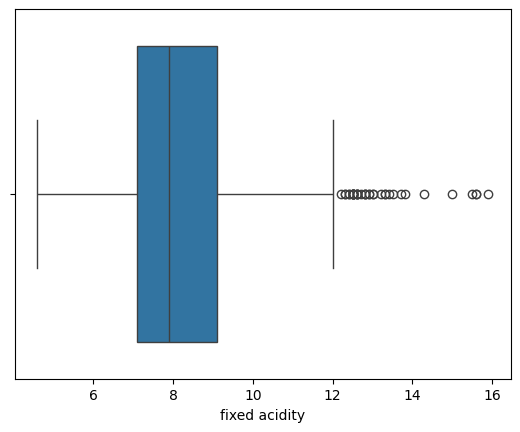

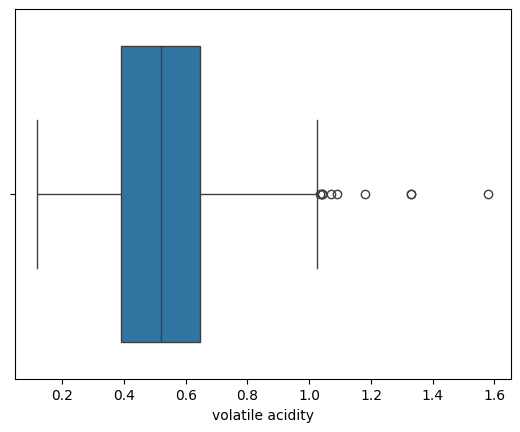

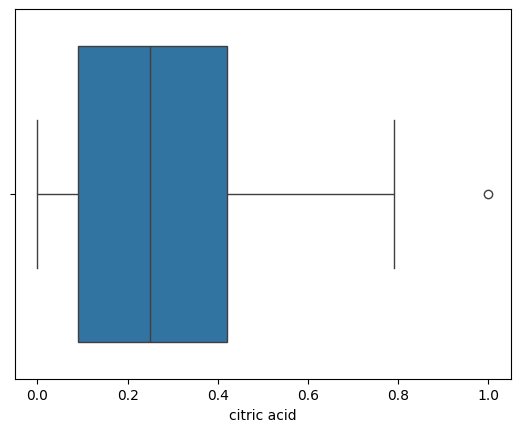

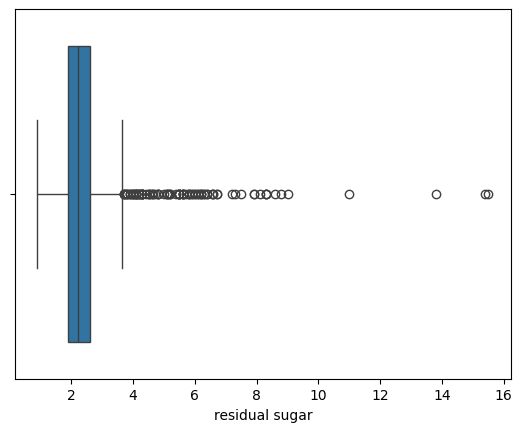

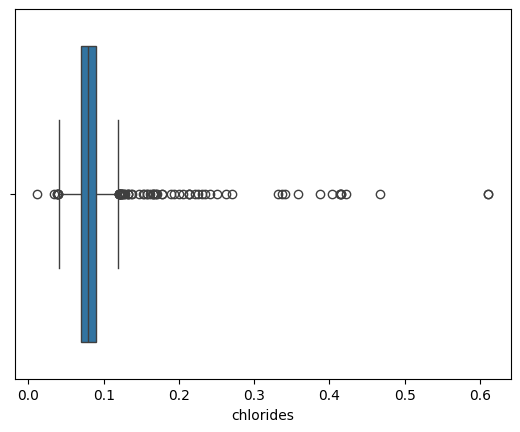

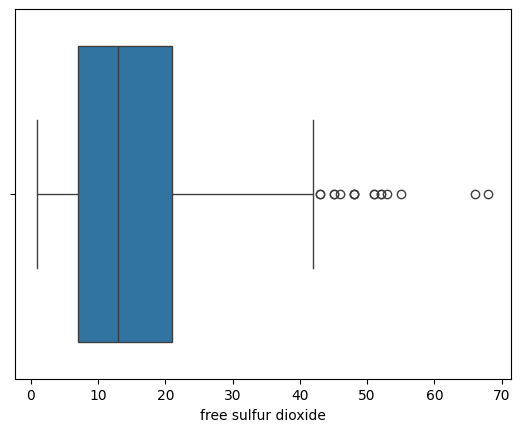

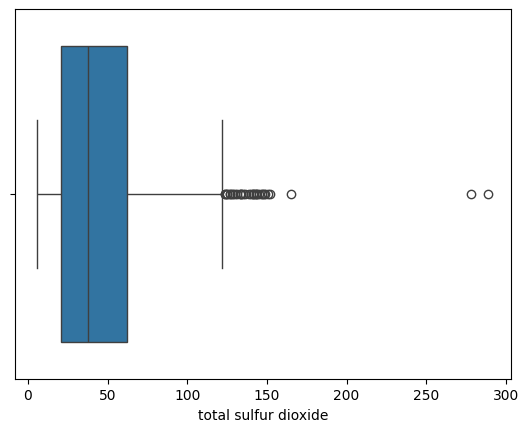

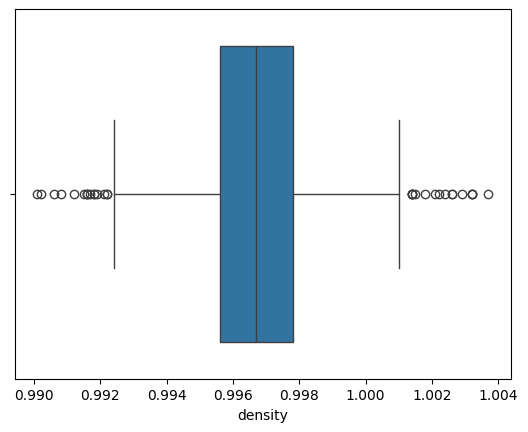

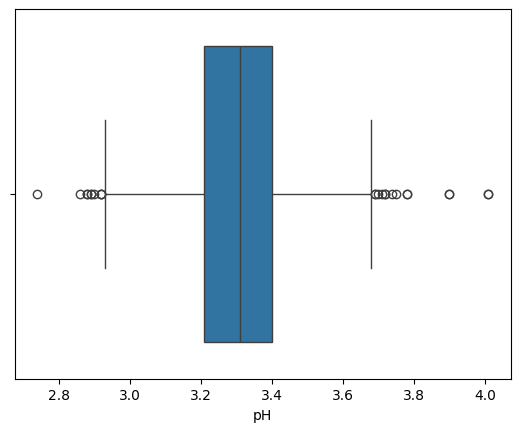

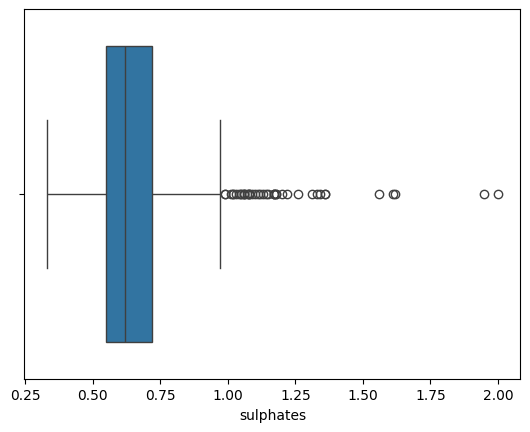

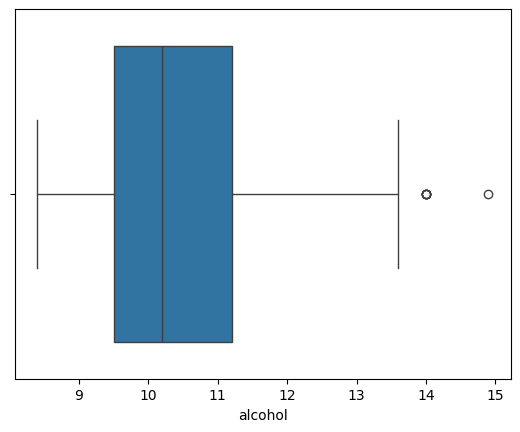

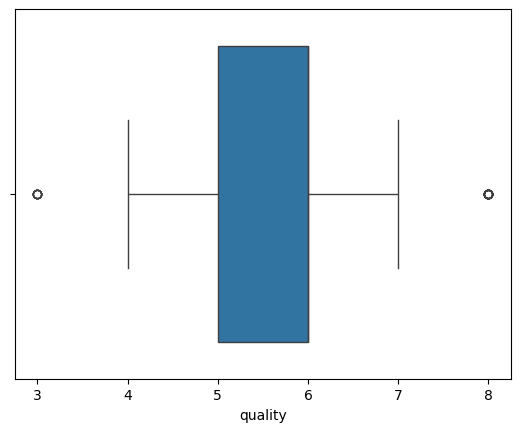

In [54]:
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[column])
    plt.show()


In [55]:
# Selecting numeric columns only
numeric_cols = df.select_dtypes(include='number').columns
# Remove outliers column by column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (713, 12)


EDA IS PERFORMED ON THE DATA SUCCESSFULLY


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [57]:
x=df.iloc[:,:-1]

In [58]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.9957,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.9965,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.9951,3.52,0.76,11.2


In [59]:
y=df.iloc[:,-1]

In [61]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
   x , y, test_size=0.2, random_state=42
)


In [62]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict=dt.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy doesn't need 'average', but the others do!
print("Decision Tree Accuracy:", accuracy_score(y_test, y_predict))

# Add average='weighted' to these three:
print("Decision Tree Precision:", precision_score(y_test, y_predict, average='weighted'))
print("Decision Tree Recall:", recall_score(y_test, y_predict, average='weighted'))
print("Decision Tree F1 Score:", f1_score(y_test, y_predict, average='weighted'))

Decision Tree Accuracy: 0.5104895104895105
Decision Tree Precision: 0.5013736263736264
Decision Tree Recall: 0.5104895104895105
Decision Tree F1 Score: 0.5053011504624408


In [64]:
from sklearn.metrics import accuracy_score

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_predict)

# Print it as a percentage
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# --- Optional: See how many it got right vs total ---
correct_predictions = (y_test == y_predict).sum()
total_predictions = len(y_test)

print(f"Correct Guesses: {correct_predictions} out of {total_predictions}")

Decision Tree Accuracy: 51.05%
Correct Guesses: 73 out of 143


CHECKING AND TRAINING ON DIFFERENT MODEL MAY BE ACCURACY IMPROVES

In [65]:

from sklearn.linear_model import LogisticRegression

# Create model
log_model = LogisticRegression()

# Train model
log_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred = log_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_predict, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.5734265734265734
Precision: 0.5013736263736264
Recall: 0.5734265734265734
F1 Score: 0.5525384311486239


CHECKING RANDOM FOREST MAY BE ACCURACY IMPROVES

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Create the "Forest"
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train it
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Check the new Accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")

Random Forest Accuracy: 56.64%


NOW CONVERTING MULTICLASS INTO BINARY CLASS

In [69]:
# Create a copy so we don't ruin the original data
df_binary = df.copy()
# Re-bin: 7 and above is 1, below 7 is 0
df_binary['quality'] = df_binary['quality'].apply(lambda x: 1 if x >= 7 else 0)
# Split features and the new binary target
X = df_binary.drop('quality', axis=1)
y = df_binary['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Initialize and Train
dt.fit(X_train, y_train)
# Predict
y_pred_bin = dt.predict(X_test)
# Results
print(f"New Binary Accuracy: {accuracy_score(y_test, y_pred_bin)*100:.2f}%")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred_bin))

New Binary Accuracy: 88.11%

Detailed Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       126
           1       0.50      0.47      0.48        17

    accuracy                           0.88       143
   macro avg       0.71      0.70      0.71       143
weighted avg       0.88      0.88      0.88       143



it improves accuracy but it is not a good approach everytime